# Métodos Computacionales


## Unidad 3: 

### Ecuaciones diferenciales
- EDO Simbólico
- Metodo de Euler
- Método de Verlet
- Runge-kuta

In [19]:
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

import matplotlib.pyplot as plt
import numpy as np

### Taller

**1** 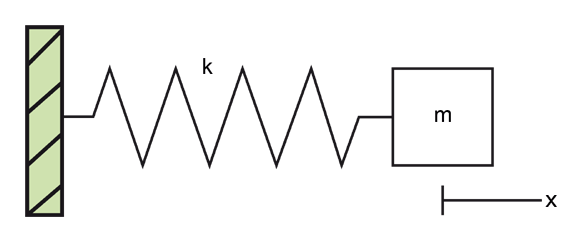

La ecuación de movimiento según la segunda ley de Newton es
$$ m\frac{d^2x}{dt^2} = -kx $$
Reescriba esto en latex y en este notebook como una ecuacion EDO y el sistema de euler equivalente.

Luego, usando las condiciones iniciales $ x (0) = 0 $ y  $ v (0) = 3 $, resuelve el sistema anterior. Grafique las soluciones $ x (t) $ y $ y (t) $ y compárelas con soluciones reales. Además, calcule la energía total del sistema. ¿Qué puedes concluir sobre el comportamiento de la energía? ¿Tiene algún sentido?

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sympy as sym

#notacion punto
import sympy.physics.mechanics as mech
mech.init_vprinting()

Segunda ley de Newton para el movimiento armónico simple: 

$$ m\frac{d^2x}{dt^2}= -kx$$

$$ \frac{d^2x}{dt^2}= \frac{-kx}{m}$$

Siendo 

$$ w= \sqrt\frac{k}{m}$$

La ecuación queda 

$$ \frac{d^2x}{dt^2}= -w^2 x$$

In [21]:
t = sym.Symbol('t')
w = sym.Symbol('w')
x = sym.Function('x')
x0 = sym.Symbol('x0')
v = sym.Function('v')

f = -w*w*x(t)
ics = {x(0): 0, sym.diff(x(t), t).subs(t,0):3}

eq_a=sym.Eq((x(t).diff(t)).diff(t), f)

In [22]:
sol_edo=sym.dsolve((x(t).diff(t)).diff(t) - f)
sol_edo

In [23]:
solucion=sym.dsolve(eq_a, ics=ics)
solucion

In [24]:
x=solucion.rhs
print("Posición:")
x

Posición:


In [25]:
v=x.diff(t)
print("velocidad:")
v

velocidad:


##### Aquí ya no supe cómo hacerla por los valores de i

**2** Se suelta un objeto (inicialmente en reposo) desde una altura de $100$ m.

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = -g \\
		 y(0) = 100 \\
         y'(0) = 0
	       \end{array}
	     \right.
\end{equation}

Solucione el problema con el método de Velet, analice la solución numerica y la solución exacta dada con sympy

##### Primero lo haré con el método Velet

In [26]:
y0y=100
tf=4.5
dy0=0
ninter=100
def y2(v):
    return -9.8

def verlet(f,a,b,xf,ninter):
    dx=xf/(ninter-1)
    xs=np.arange(0,xf+dx,dx)
    ys=np.zeros(np.size(xs))
    
    yinit=a-dx*b+0.5*dx*dx*f(a)
    ys[0]=yinit
    ys[1]=a
    for i in range(1,ninter-1):
        ys[i+1]=2*ys[i]-ys[i-1]+f(ys[i])*pow(dx,2)
    return xs,ys

xsdata, ysdata = verlet(y2, y0y, dy0, tf, 100)

##### Ahora con Sympy

In [27]:
t = sym.Symbol('t')
x = sym.Function('x')
v = sym.Function('v')

ff = -9.8
icsx = {x(0): 100, sym.diff(x(t), t).subs(t,0):0}

eq=sym.Eq((x(t).diff(t)).diff(t), ff)
eq

In [28]:
sol_=sym.dsolve((x(t).diff(t)).diff(t) - ff)
sol_

Ahora se ingresan las condiciones iniciales icsx

In [29]:
soleq = sym.dsolve(eq, ics=icsx)
soleq

##### La ecuación de posición es:

In [30]:
pos=soleq.rhs
pos

##### Y la de velocidad:
    

In [31]:
vel=pos.diff(t)
vel

##### Ahora se gráfica

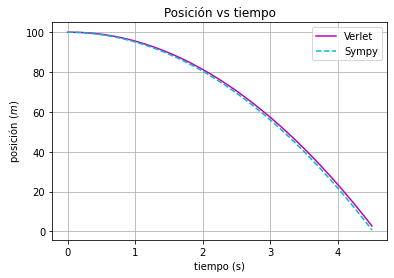

In [32]:
np_pos=sym.lambdify(t,pos,'numpy')

tt=np.linspace(0,4.5)
pos_numpy=np_pos(tt)

plt.plot(xsdata, ysdata, 'm', label='Verlet')
plt.plot(tt,pos_numpy, '--c', label='Sympy')
plt.xlabel('tiempo (s)')
plt.ylabel('posición $(m)$')
plt.title('Posición vs tiempo')
plt.legend()
plt.grid()

**3** Usando los metodos de Runge-Kutta de segundo orden, encuentre la solucion al sistema

$$\frac{dy}{dx}=1-y-y^3$$ con $$y(0)=0$$

X:
 [-10, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.500000000000002, -9.400000000000002, -9.300000000000002, -9.200000000000003, -9.100000000000003, -9.000000000000004, -8.900000000000004, -8.800000000000004, -8.700000000000005, -8.600000000000005, -8.500000000000005, -8.400000000000006, -8.300000000000006, -8.200000000000006, -8.100000000000007, -8.000000000000007, -7.9000000000000075, -7.800000000000008, -7.700000000000008, -7.6000000000000085, -7.500000000000009, -7.400000000000009, -7.30000000000001, -7.20000000000001, -7.10000000000001, -7.000000000000011]
Y(x):
 [0, 0.0949875, 0.18069242287452536, 0.25747142948241913, 0.3255623870447173, 0.38523515996008934, 0.43687329832937905, 0.48099890695090036, 0.5182562847380546, 0.5493719325243613, 0.5751069135933031, 0.5962130862731051, 0.6133994271593032, 0.6273102174990086, 0.6385140123845305, 0.6475009860711278, 0.6546859968573674, 0.6604150507710268, 0.6649733971441564, 0.6685940452594304, 0.6714659521472873, 0.6737414722

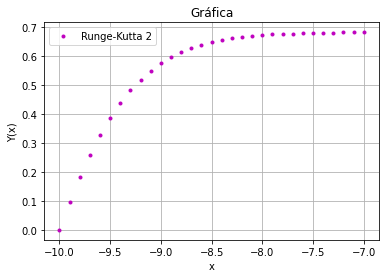

In [33]:
def derivs(x, y):
    return 1-y-y**3

def rungeKutta23(f, x0, y0, xfin, h):
    yout=[]
    xout=[]
    n = (int)((xfin - x0)/h)
    y = y0
    yout.append(y)
    xout.append(x0)
    for i in range(1, n + 1):
        k1 = h * f(x0, y)
        k2 = h * f(x0 + 0.5 * h, y + 0.5 * k1)
 
        y = y + k2
        yout.append(y)
        x0 = x0 + h
        xout.append(x0)
    return xout,yout

#Condiciones 
xini=-10
y0=0
xfin=-7
h=0.1
Sol_sis = rungeKutta23(derivs, xini, y0, xfin, h)
print("X:\n",Sol_sis[0])
print("Y(x):\n",Sol_sis[1])

plt.plot(Sol_sis[0] ,Sol_sis[1],'.m', label='Runge-Kutta 2')
plt.grid()
plt.title('Gráfica')
plt.xlabel('x')
plt.ylabel('Y(x)')
plt.legend()

**4** Considere los siguientes PVI:

$$
\begin{align}
y' &= t+y, y(0)=0\\
y' &= t-y, y(0)=0\\
y' &= 4t-2y, y(0)=0
\end{align} $$

- Utilice los métodos de Euler y RK4 para obtener las soluciones numéricas correspondientes usando $\Delta x = 0.1$

- Encuentre la solución exacta con sympy

- Gráfique las soluciones numericas junto con la exacta y compare cual método funciona mejor en cada caso.

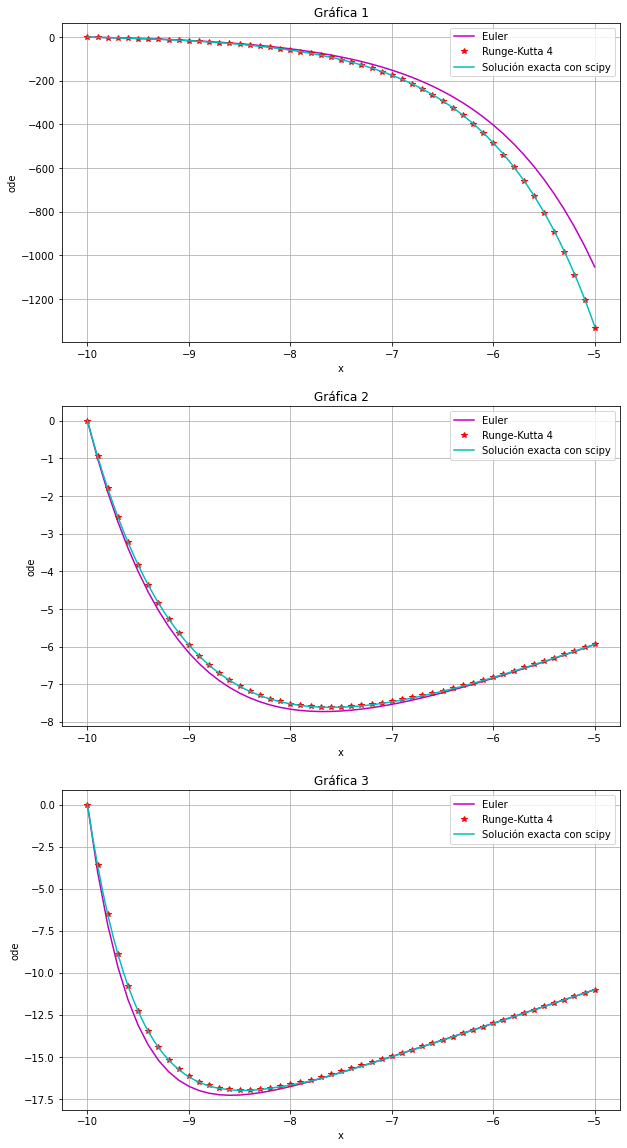

In [34]:
def rungeKutta4(f, x0, y0, xfin, h):
    yout=[]
    xout=[]
    n = (int)((xfin - x0)/h)
    y = y0
    yout.append(y)
    xout.append(x0)
    for i in range(1, n + 1):
        k1 = h * f(x0, y)
        k2 = h * f(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x0 + h, y + k3)
 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        yout.append(y)
        x0 = x0 + h
        xout.append(x0)
    return xout,yout

def euler(f, a, b, h, yini):
    x=np.arange(a, b+h, h)
    y=np.zeros(len(x)) 
    y[0]=yini
    for i in range(0, len(x)-1):
        y[i+1] = y[i] + f(x[i],y[i])*h
    return x, y

#Ecuación A
def derivs(t, y):
    return t+y
 
#Condiciones para la RK45 y Euler
xini=-10
y0=0
xfin=-5
h=0.1
Solución1 = rungeKutta4(derivs, xini, y0, xfin, h)
x1_1, y1_1=euler(derivs, xini, xfin, h, y0)

#Condiciones para scipy
t_span=[-10,-5]
myt_eval=np.linspace(-10,-5,100)
y00=[0]
sol1 = solve_ivp(derivs, t_span, y00, method='RK23', t_eval=myt_eval)

#Ecuación B
def funB(t, y):
    return t-y
Solución2 = rungeKutta4(funB, xini, y0, xfin, h)
x1_2, y1_2=euler(funB, xini, xfin, h, y0)
sol2 = solve_ivp(funB, t_span, y00, method='RK23', t_eval=myt_eval)

#Ecuación C
def funC(t, y):
    return 4*t-2*y
Solución3 = rungeKutta4(funC, xini, y0, xfin, h)
x1_3, y1_3=euler(funC, xini, xfin, h, y0)
sol3 = solve_ivp(funC, t_span, y00, method='RK23', t_eval=myt_eval)

#Gráficas

fig, a = plt.subplots(3,1, figsize=(10,20))

a[0].plot(x1_1, y1_1,'-m',label='Euler')
a[0].plot(Solución1[0] ,Solución1[1],'*r', label='Runge-Kutta 4')
a[0].plot(sol1.t,sol1.y[0],'c',label='Solución exacta con scipy')
a[0].set_xlabel('x')
a[0].set_ylabel('ode')
a[0].set_title('Gráfica 1')
a[0].legend()
a[0].grid()

a[1].plot(x1_2, y1_2,'-m',label='Euler')
a[1].plot(Solución2[0] ,Solución2[1],'*r', label='Runge-Kutta 4')
a[1].plot(sol2.t,sol2.y[0],'c',label='Solución exacta con scipy')
a[1].set_xlabel('x')
a[1].set_ylabel('ode')
a[1].set_title('Gráfica 2')
a[1].legend()
a[1].grid()

a[2].plot(x1_3, y1_3,'-m',label='Euler')
a[2].plot(Solución3[0] ,Solución3[1],'*r', label='Runge-Kutta 4')
a[2].plot(sol3.t,sol3.y[0],'c',label='Solución exacta con scipy')
a[2].set_xlabel('x')
a[2].set_ylabel('ode')
a[2].set_title('Gráfica 3')
a[2].legend()
a[2].grid()

##### Se puede ver que el mejor método para los 3 casos es el Runge-Kutta 4

**5** Resolvamos el problema de la pelota que rebota con el integrador más simple de todos: el esquema de Euler hacia adelante.

Tenemos que resolver la *EDO de segundo orden* (ecuaciones de movimiento de Newton con aceleración constante)

$$
\frac{d^2 y}{dt^2} = -g
$$

donde $ g $ es la aceleración constante debida a la gravedad y $ y (t) $ es la posición de la pelota en función del tiempo (su
trayectoria).

El esquema de Euler hacia adelante para cualquier *EDO de primer orden*

$$ \frac{dy}{dt} = f(y, t) $$

es

$$ y(t + h) = y(t) + h f(y(t), t). $$

Para resolver la ecuación de movimiento original de segundo orden, hacemos uso del hecho de que una EDO de $ n $ -ésimo orden puede escribirse como $ n $ EDO acopladas de primer orden, a saber

$$
\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g.
\end{align} $$

Resuelva cada una de las EDO de primer orden con el algoritmo de Euler:

$$
\begin{align}
y(t + h) &= y(t) + h v(t)\\
v(t + h) &= v(t) - h g.
\end{align} $$


Voy a tomar las mismas condiciones del punto 2  
$$Posición inicial y00=100$$
$$Posición final yf=0$$
$$Tiempo inicial ta=0$$
$$Tiempo final tb=5$$
$$Velocidad inicial v0=0$$
$$h=0.1$$

In [35]:
ta=0
tb=5
y00=100
yf=0
v0=0
h=0.1

Escribo la función fa para la aceleración y luego, con las condiciones iniciales y la función euler, se halla velocidad

Valores de velocidad= 
 [  0.    -0.98  -1.96  -2.94  -3.92  -4.9   -5.88  -6.86  -7.84  -8.82
  -9.8  -10.78 -11.76 -12.74 -13.72 -14.7  -15.68 -16.66 -17.64 -18.62
 -19.6  -20.58 -21.56 -22.54 -23.52 -24.5  -25.48 -26.46 -27.44 -28.42
 -29.4  -30.38 -31.36 -32.34 -33.32 -34.3  -35.28 -36.26 -37.24 -38.22
 -39.2  -40.18 -41.16 -42.14 -43.12 -44.1  -45.08 -46.06 -47.04 -48.02
 -49.  ]
Valores de Posición= 
 [100.    100.     99.902  99.706  99.412  99.02   98.53   97.942  97.256
  96.472  95.59   94.61   93.532  92.356  91.082  89.71   88.24   86.672
  85.006  83.242  81.38   79.42   77.362  75.206  72.952  70.6    68.15
  65.602  62.956  60.212  57.37   54.43   51.392  48.256  45.022  41.69
  38.26   34.732  31.106  27.382  23.56   19.64   15.622  11.506   7.292
   2.98   -1.43   -5.938 -10.544 -15.248 -20.05 ]


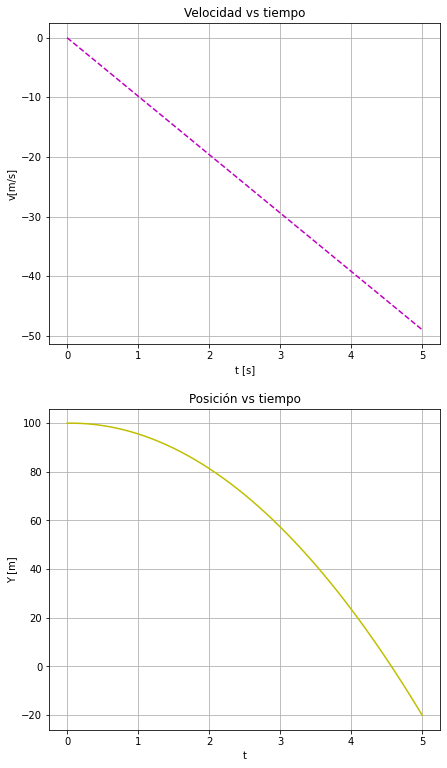

In [36]:
def fa(v, t):   
    return -9.8

sol_velo=euler(fa, ta, tb, h, v0)
print("Valores de velocidad= \n", sol_velo[1])

#Gráfica velocidad, tiempo

fig, b = plt.subplots(2,1, figsize=(7,13))
b[0].plot(sol_velo[0], sol_velo[1], '--m')
b[0].set_title('Velocidad vs tiempo')
b[0].set_xlabel('t [s]')
b[0].set_ylabel('v[m/s]')
b[0].grid()

def eulerf(velocidad, a, b, h, yini): #Esta es la misma función euler pero en lugar de ingresar la función, ingreso los
    x=np.arange(a, b+h, h)            #valores de la velocidad.
    y=np.zeros(len(x)) 
    y[0]=yini
    for i in range(0, len(x)-1):
        y[i+1] = y[i] + velocidad[i]*h
    return x, y

t, yy=eulerf(sol_velo[1], ta, tb, h, y00)
print("Valores de Posición= \n", yy)

b[1].plot(t, yy, 'y')   #Gráfica de posición
b[1].set_xlabel('t')
b[1].set_ylabel('Y [m]')
b[1].set_title('Posición vs tiempo')
b[1].grid()